# Model Testing
## Using Neural Networks

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

2025-04-11 03:20:43.853116: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 03:20:43.856116: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-11 03:20:43.864231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744341643.878370   98310 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744341643.882947   98310 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744341643.894336   98310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
dataset = pd.read_csv("1.4.2.training_data.csv")  # Replace with your dataset path

In [4]:
print(dataset.columns)
dataset.columns = dataset.columns.str.strip()
print("Columns in dataset:", dataset.columns)
print(dataset.drop(columns=["time", "wind_spd_kmh", "gust_kmh", "gust_diff"]))

Index(['time', 'air_temp', 'apparent_t', 'dewpt', 'rel_hum', 'delta_t',
       'wind_dir_deg', 'wind_spd_kmh', 'gust_kmh', 'rain_trace', 'rain_ten',
       'rain_hour', 'press', 'wet_bulb_temperature', 'gust_diff'],
      dtype='object')
Columns in dataset: Index(['time', 'air_temp', 'apparent_t', 'dewpt', 'rel_hum', 'delta_t',
       'wind_dir_deg', 'wind_spd_kmh', 'gust_kmh', 'rain_trace', 'rain_ten',
       'rain_hour', 'press', 'wet_bulb_temperature', 'gust_diff'],
      dtype='object')
       air_temp  apparent_t     dewpt  rel_hum   delta_t  wind_dir_deg  \
0      0.468401    0.332512  0.658730     0.98  0.000000      0.761111   
1      0.648699    0.487685  0.706349     0.60  0.269006      0.144444   
2      0.518587    0.362069  0.632275     0.77  0.116959      0.397222   
3      0.669145    0.576355  0.735450     0.60  0.274854      0.119444   
4      0.449814    0.187192  0.441799     0.60  0.187135      0.986111   
...         ...         ...       ...      ...       ...    

In [5]:
# Define neural network
model = Sequential(
    [
        Dense(30, activation="relu", input_shape=(10,)),
        Dense(30, activation="relu"),  # Hidden layer
        Dense(3, activation="linear"),  # Output layer for regression
    ]
)

/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-11 03:20:46.915358: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# set the seed for reproducibility
tf.random.set_seed(42)

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# all columns except "wind_spd_kmh", "time", and "gust_kmh" are features
X = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg", "gust_diff"]
).to_numpy()

# wind_spd_kmh and gust_kmh are the target variables
y = dataset[["wind_spd_kmh", "gust_kmh", "wind_dir_deg"]].to_numpy()

print("X:", X)
print("y:", y)

early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# Split the dataset into training and testing set


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X: [[0.46840149 0.33251232 0.65873016 ... 0.         0.73875803 0.49803922]
 [0.64869888 0.48768473 0.70634921 ... 0.         0.63811563 0.67843137]
 [0.51858736 0.36206897 0.63227513 ... 0.         0.80728051 0.51764706]
 ...
 [0.49442379 0.38916256 0.69047619 ... 0.         0.77944325 0.54901961]
 [0.63754647 0.63054187 0.88095238 ... 0.         0.29550321 0.83529412]
 [0.65055762 0.52463054 0.6957672  ... 0.         0.63811563 0.67058824]]
y: [[0.07526882 0.09677419 0.76111111]
 [0.30107527 0.37634409 0.14444444]
 [0.13978495 0.1827957  0.39722222]
 ...
 [0.04301075 0.09677419 0.73055556]
 [0.09677419 0.09677419 0.89166667]
 [0.21505376 0.27956989 0.11111111]]


In [7]:
# Train the model
model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)
if early_stopping.stopped_epoch > 0:
    print(f"Training stopped early at epoch {early_stopping.stopped_epoch + 1}")
else:
    print("Training completed without early stopping")

Epoch 1/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0605 - mae: 0.1763 - val_loss: 0.0290 - val_mae: 0.1223
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0269 - mae: 0.1182 - val_loss: 0.0231 - val_mae: 0.0998
Epoch 3/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0213 - mae: 0.0919 - val_loss: 0.0196 - val_mae: 0.0805
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188 - mae: 0.0745 - val_loss: 0.0193 - val_mae: 0.0801
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 - mae: 0.0727 - val_loss: 0.0191 - val_mae: 0.0790
Epoch 6/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184 - mae: 0.0720 - val_loss: 0.0189 - val_mae: 0.0777
Epoch 7/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0183 - mae: 0.0716 - val_loss: 0.0188 - val_mae: 0.0770
Epoch 8/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0182 - mae: 0.0712 - val_loss: 0.0186 - val_mae: 0.0764
Epoch 9/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [8]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.5f}, Test MAE: {mae:.5f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0163 - mae: 0.0639
Test Loss: 0.01613, Test MAE: 0.06348


In [9]:
# which columns are most important
importances = model.layers[0].get_weights()[0]
importances = np.abs(importances).sum(axis=1)
indices = np.argsort(importances)[::-1]

# Extract feature names from the dataset
feature_names = dataset.drop(
    columns=["time", "wind_spd_kmh", "gust_kmh", "wind_dir_deg", "gust_diff"]
).columns

print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]})")

# print the model structure and weights

model.summary()

Feature ranking:
1. rain_trace (8.858405113220215)
2. apparent_t (7.9854536056518555)
3. dewpt (6.979893207550049)
4. delta_t (6.8162760734558105)
5. rel_hum (6.325686454772949)
6. press (6.080270290374756)
7. rain_hour (5.5842084884643555)
8. rain_ten (5.332296371459961)
9. air_temp (5.180268287658691)
10. wet_bulb_temperature (4.787515163421631)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,061 (15.87 KB)

 Trainable params: 1,353 (5.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,708 (10.58 KB)

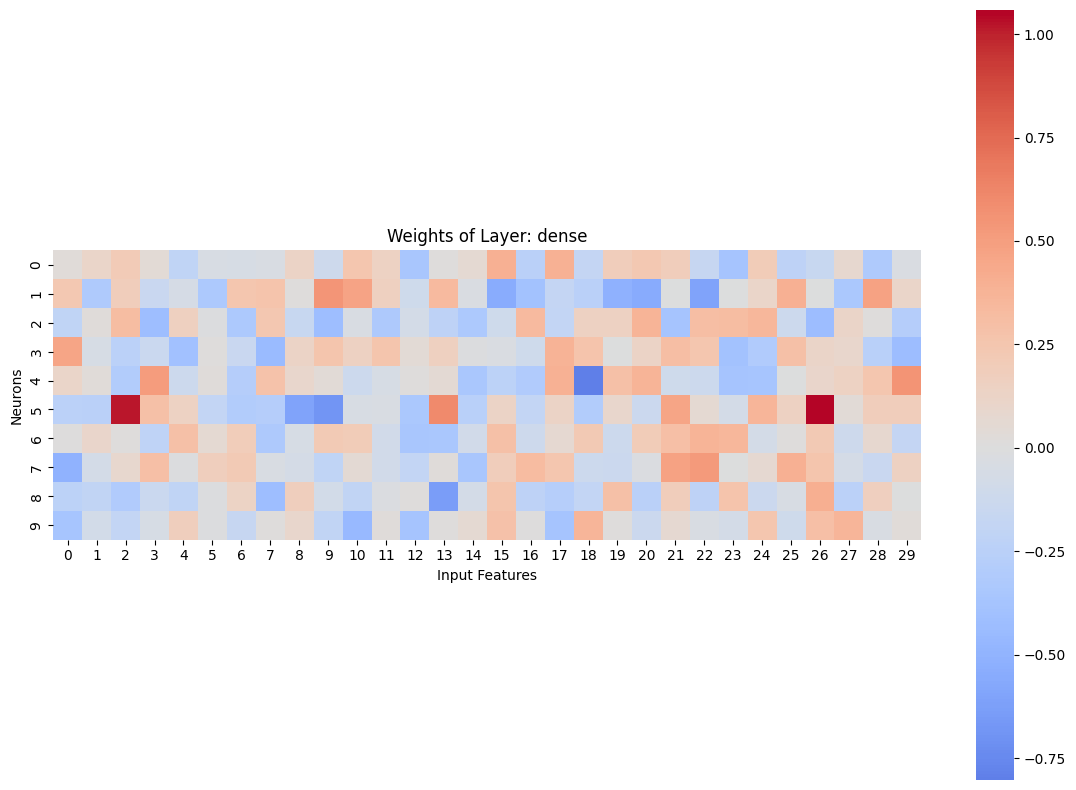

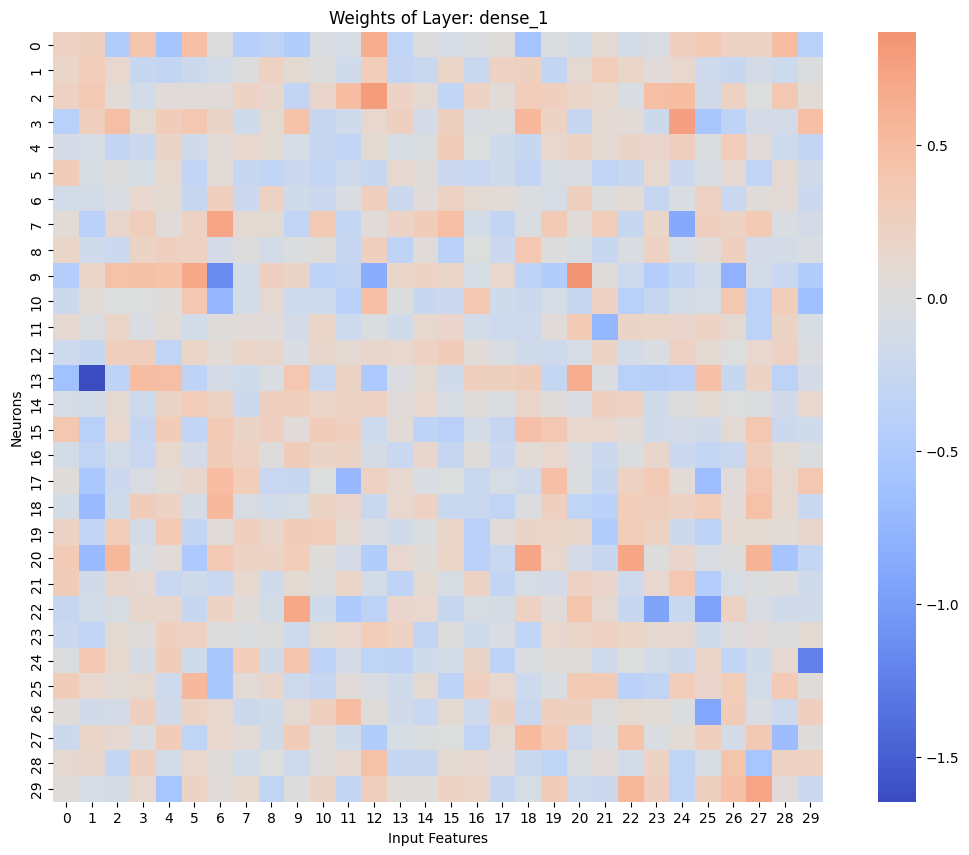

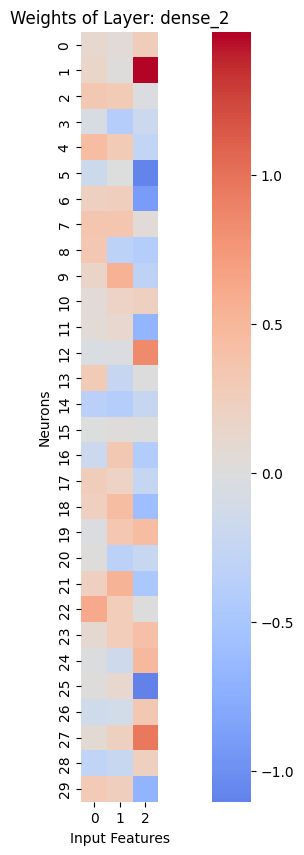

In [10]:
# visualise the model's individual neurons and weights
import matplotlib.pyplot as plt
import seaborn as sns


def plot_neuron_weights(model):
    for layer in model.layers:
        if isinstance(layer, Dense):
            weights = layer.get_weights()[0]

            plt.figure(figsize=(14, 10))
            sns.heatmap(
                weights, annot=False, cmap="coolwarm", cbar=True, center=0, square=True
            )
            plt.title(f"Weights of Layer: {layer.name}")
            plt.xlabel("Input Features")
            plt.ylabel("Neurons")
            plt.show()


plot_neuron_weights(model)

In [11]:
# Save the models to a file
model.save("../1.5.Model_Testing_and_Validation/trained_model.keras")
model.save("../../2.Model-Deployment/data/trained_model.keras")
print(
    f"""Model saved to:
    ../1.5.Model_Testing_and_Validation/trained_model.keras
    """
)

Model saved to:
    ../1.5.Model_Testing_and_Validation/trained_model.keras
    
